In [1]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
def replace_all(text):
    
    rep = {': ':'',
      ' 7 ':'/',
      'Kei/Desa -':'Kel/Desa'}
    
    for i, j in rep.items():
        text = text.replace(i, j)
    return text.strip('Alamat : ').upper()

In [16]:
def ocr(filepath):
    img = cv2.imread(filepath)
    config = r'--oem 2'

    ktp = pytesseract.image_to_string(img, lang='ind', config=config)
    ktp = ktp.splitlines()
    core = [i for i in ktp if i != ''][2:10]
    
    NIK, NAMA, TTL, KELAMIN= core[:4]
    
    NIK = re.search(r'(\d.*)', NIK).group().strip(' ')
    NAMA = re.search(r'([A-Z][A-Z].*)', NAMA).group()
    TTL = re.search(r'([A-Z][A-Z].*)', TTL).group()
    KELAMIN = re.search(r'(PEREMPUAN|LAKI-LAKI)', KELAMIN).group()

    ALAMAT = ', '.join(core[4:])
    ALAMAT = replace_all(ALAMAT)
    
    plt.imshow(img[...,::-1])
    return NIK, NAMA, TTL, KELAMIN, ALAMAT

('330907550994 0001',
 'NOVITA ASRI SEPTINA SARI',
 'BOYOLALI. 05-09-1994',
 'PEREMPUAN',
 'TARUBAN, RT/RW 008/002, KEL/DESA MOJOLEGI, KECAMATAN TERAS')

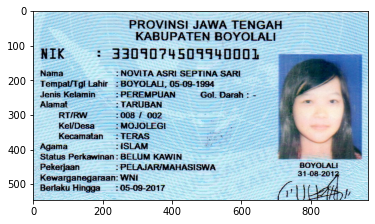

In [17]:
ocr('./iu.jpeg')

In [ ]:
img = cv2.imread('iu.jpeg')
config = r'--oem 2'

ktp = pytesseract.image_to_string(img, lang='ind', config=config)
ktp = ktp.splitlines()

In [ ]:
core

In [ ]:
rep = {': ':'',
      ' 7 ':'/',
      'Kei/Desa -':'Kel/Desa'}

alamat = ', '.join(core[4:])
alamat = replace_all(alamat,rep)
# print(re.search(r'\w.*', alamat))

In [ ]:
nik, nama, ttl, kelamin= core[:4]

In [ ]:
NIK = re.search(r'(\d.*)', nik).group()
NAMA = re.search(r'([A-Z][A-Z].*)\s', nama).group()
TTL = re.search(r'([A-Z][A-Z].*)', ttl).group()
KELAMIN = re.search(r'(PEREMPUAN|LAKI-LAKI)', kelamin).group()

TypeError: Image data of dtype <U9 cannot be converted to float

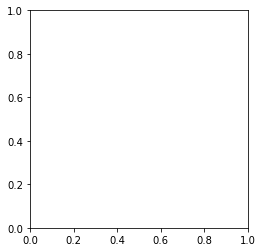

In [8]:
plt.imshow('./iu.jpeg')

In [98]:
ktp_data = pytesseract.image_to_data(img, lang='ind')
data = []

In [99]:
for i in ktp_data.splitlines():
    if len(i.split()) == 12 and len(i.split()[-1]) > 1:
        data.append(i.split()[-1])

In [100]:
print(data)

['text', 'PROVINSI', 'PAPUA', 'KOTA', 'JAYAPURA', 'NIK', '9171014107880039', 'Nama', 'ATA', 'BHAYANGKARA', 'BUSA', 'Tempat/Tgi', 'Lahir', 'JAYAPURA,', '01-07-1988', 'Jenis', 'Kelamin', 'PEREMPUAN', 'GolDarah', ':A', 'Alamat', 'APO', 'GUNUNG', 'RTRW', '008004', 'KelDesa', 'BHAYANGKARA', 'Kecamatan', 'JAYAPURA', 'UTARA', 'Agama', 'KRISTEN', 'Status', 'Perkawinan:', 'BELUM', 'KAWIN', 'Pekerjaan', 'PELAJAR/MAHASISWA', 'KOTA', 'JAYAPURA', 'Kewarganegaraan:', 'WNI', '22-05-20"', 'Berlaku', 'Hingga', '01-07-2017', '//_M']


In [101]:
stop_jenis = ['Nama','Tempat/Tgi','Jenis','GolDarah']
stop = ['NIK','Nama','Lahir','Kelamin']

next_stop = []
temp = []

In [102]:
for i in data:
    if i in stop:
        next_stop.append(data.index(i)+1)

In [103]:
next_stop

[6, 8, 13, 17]

In [104]:
for c,i in enumerate(next_stop):
#     for j in range(data.index(stop_jenis[c]) - data.index(stop[c])):
    print(data[i])

9171014107880039
ATA
JAYAPURA,
PEREMPUAN


In [105]:
NIK = data[6]

In [112]:
data[8:11]

['ATA', 'BHAYANGKARA', 'BUSA']